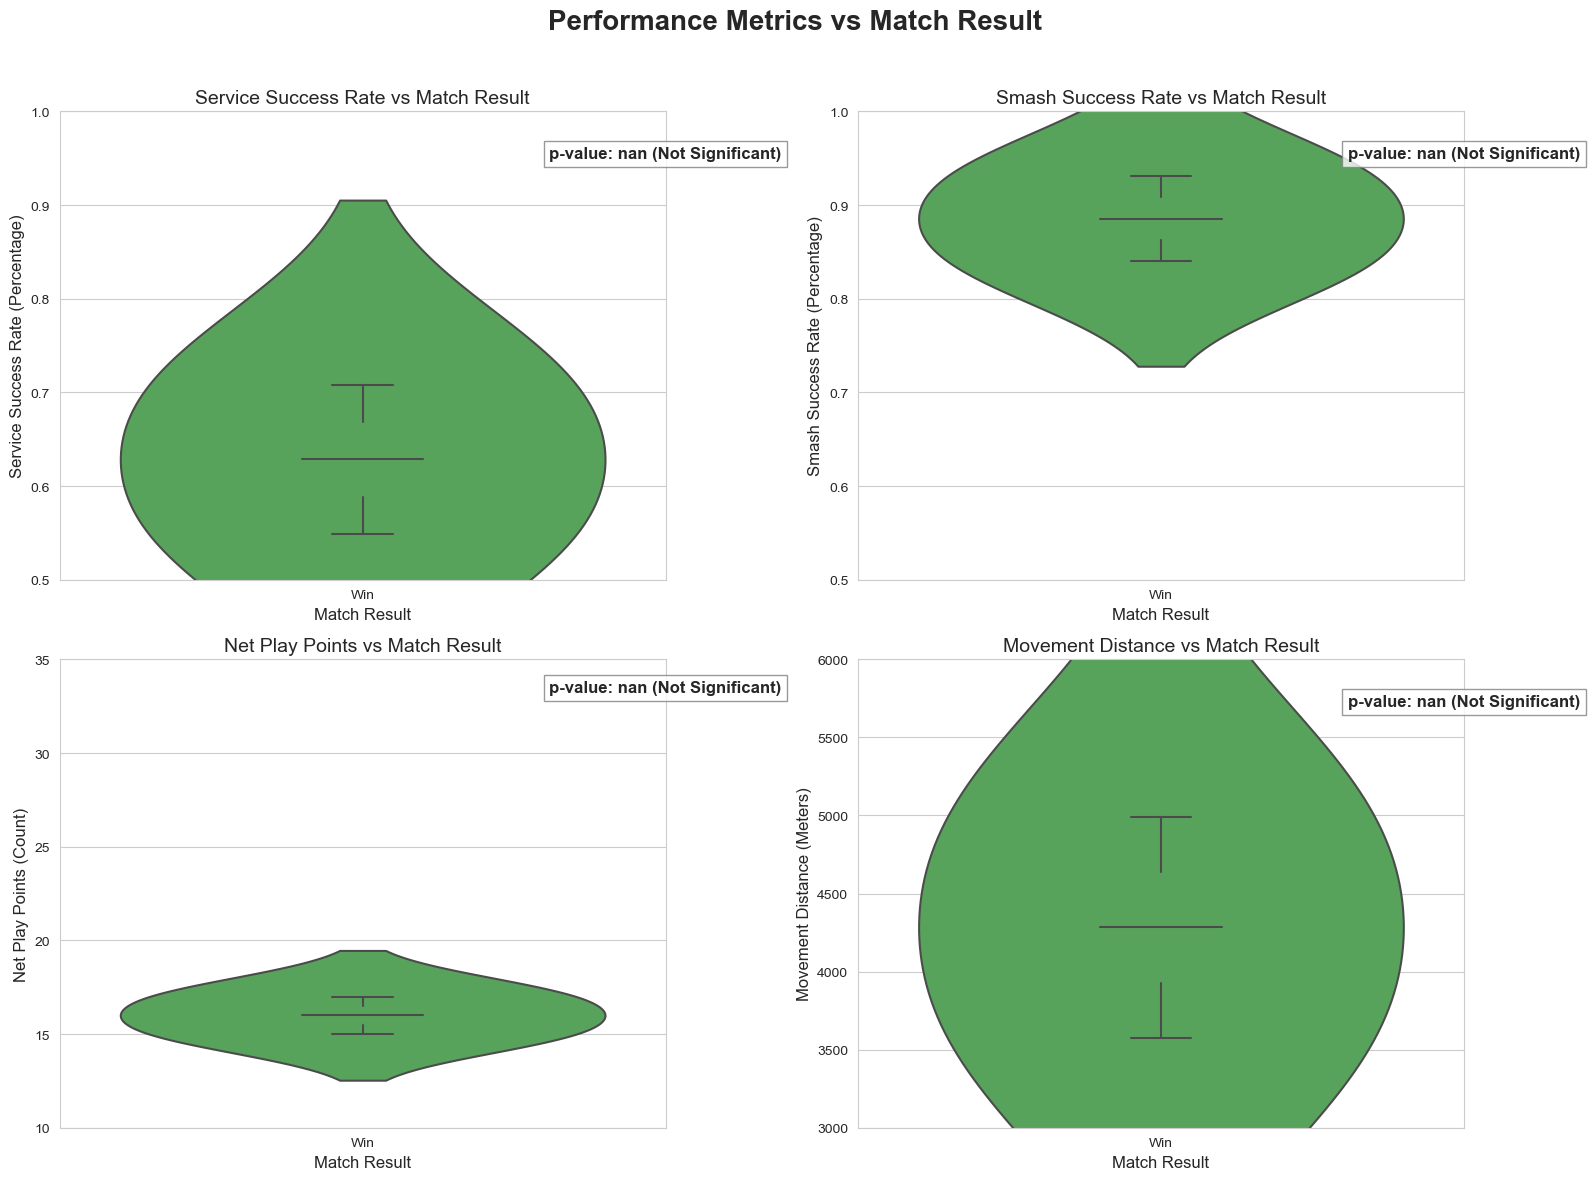

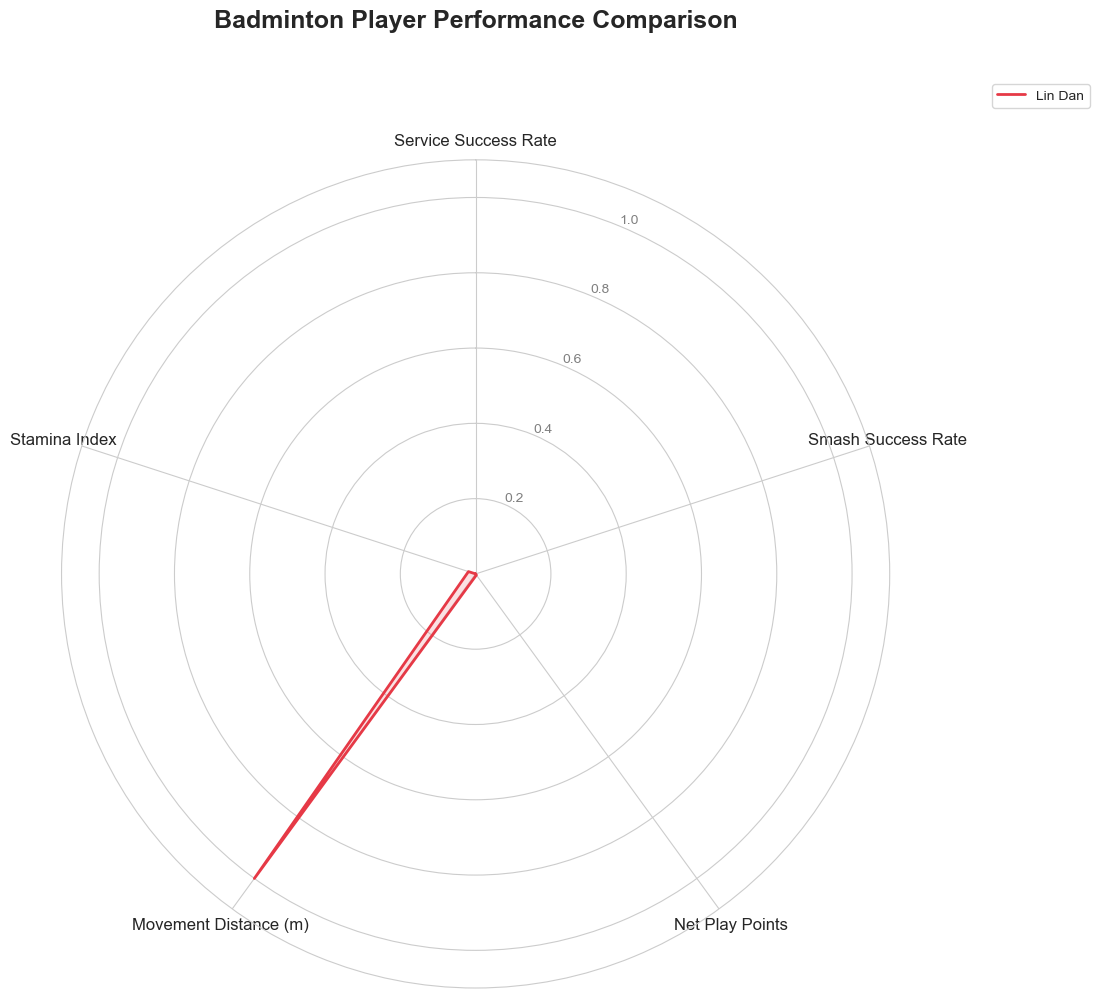

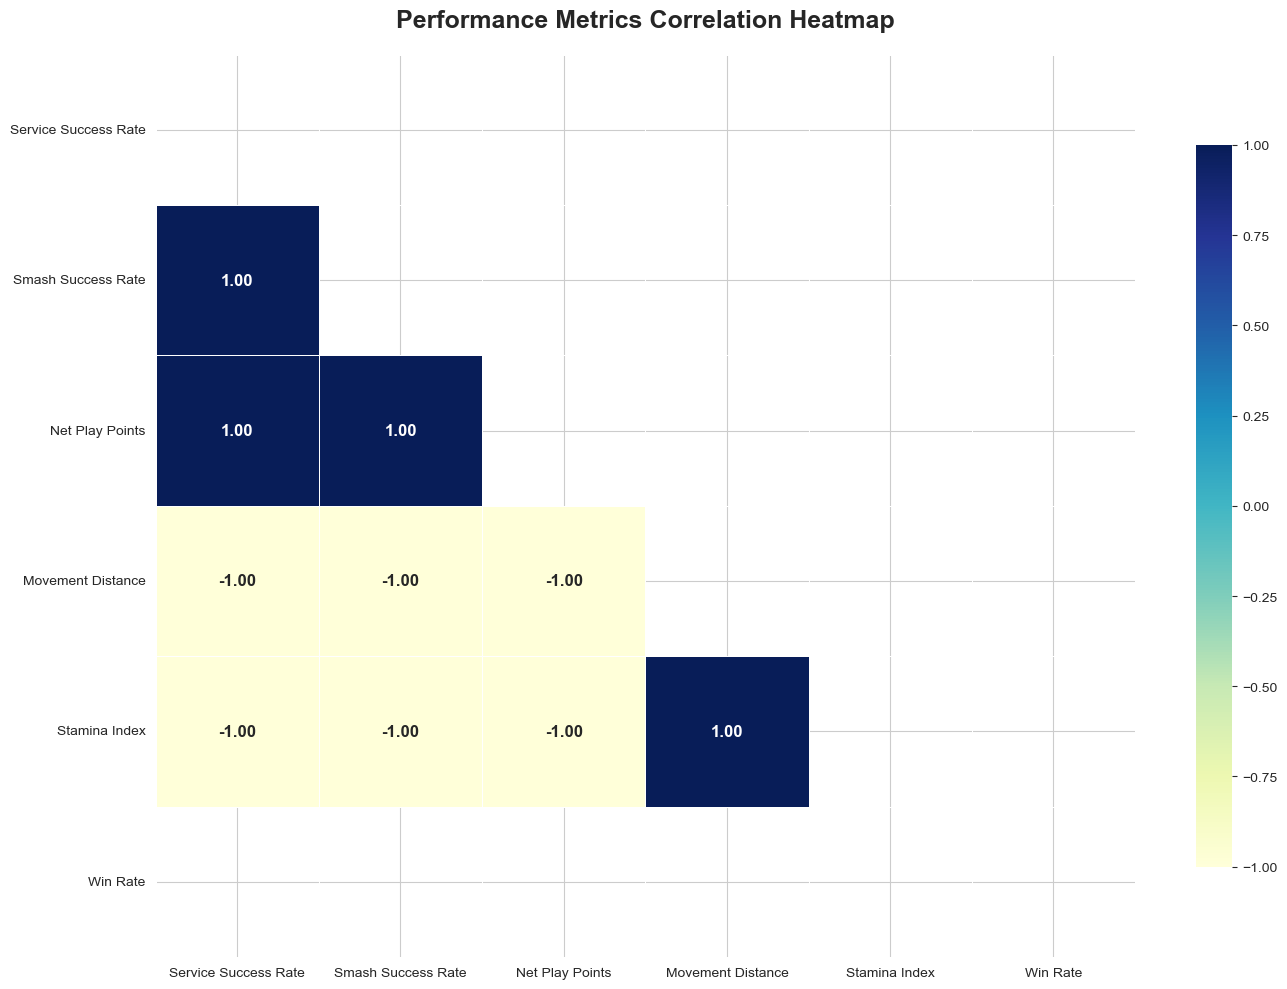

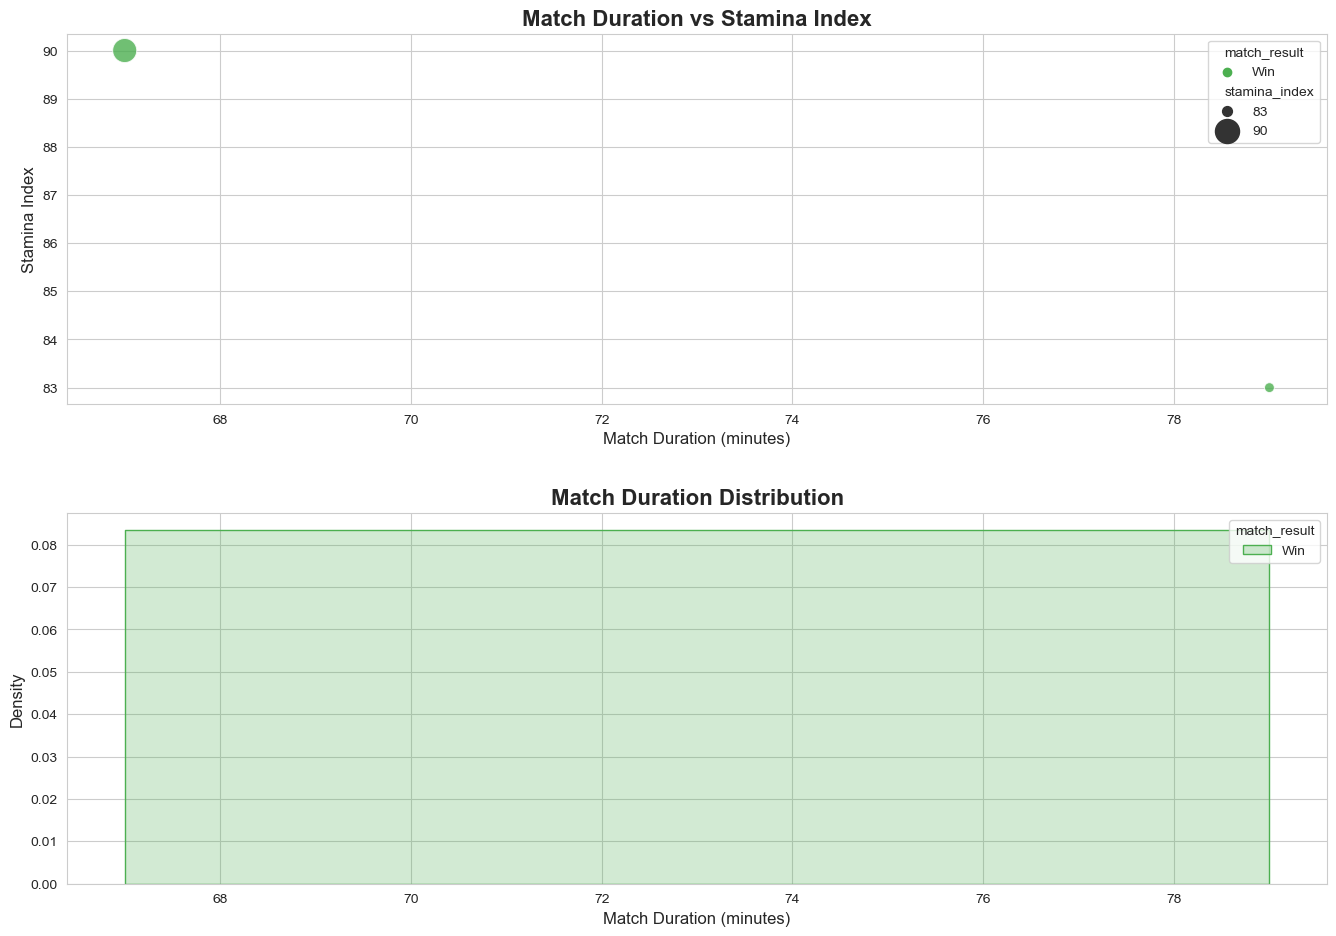

<Figure size 1600x1200 with 0 Axes>

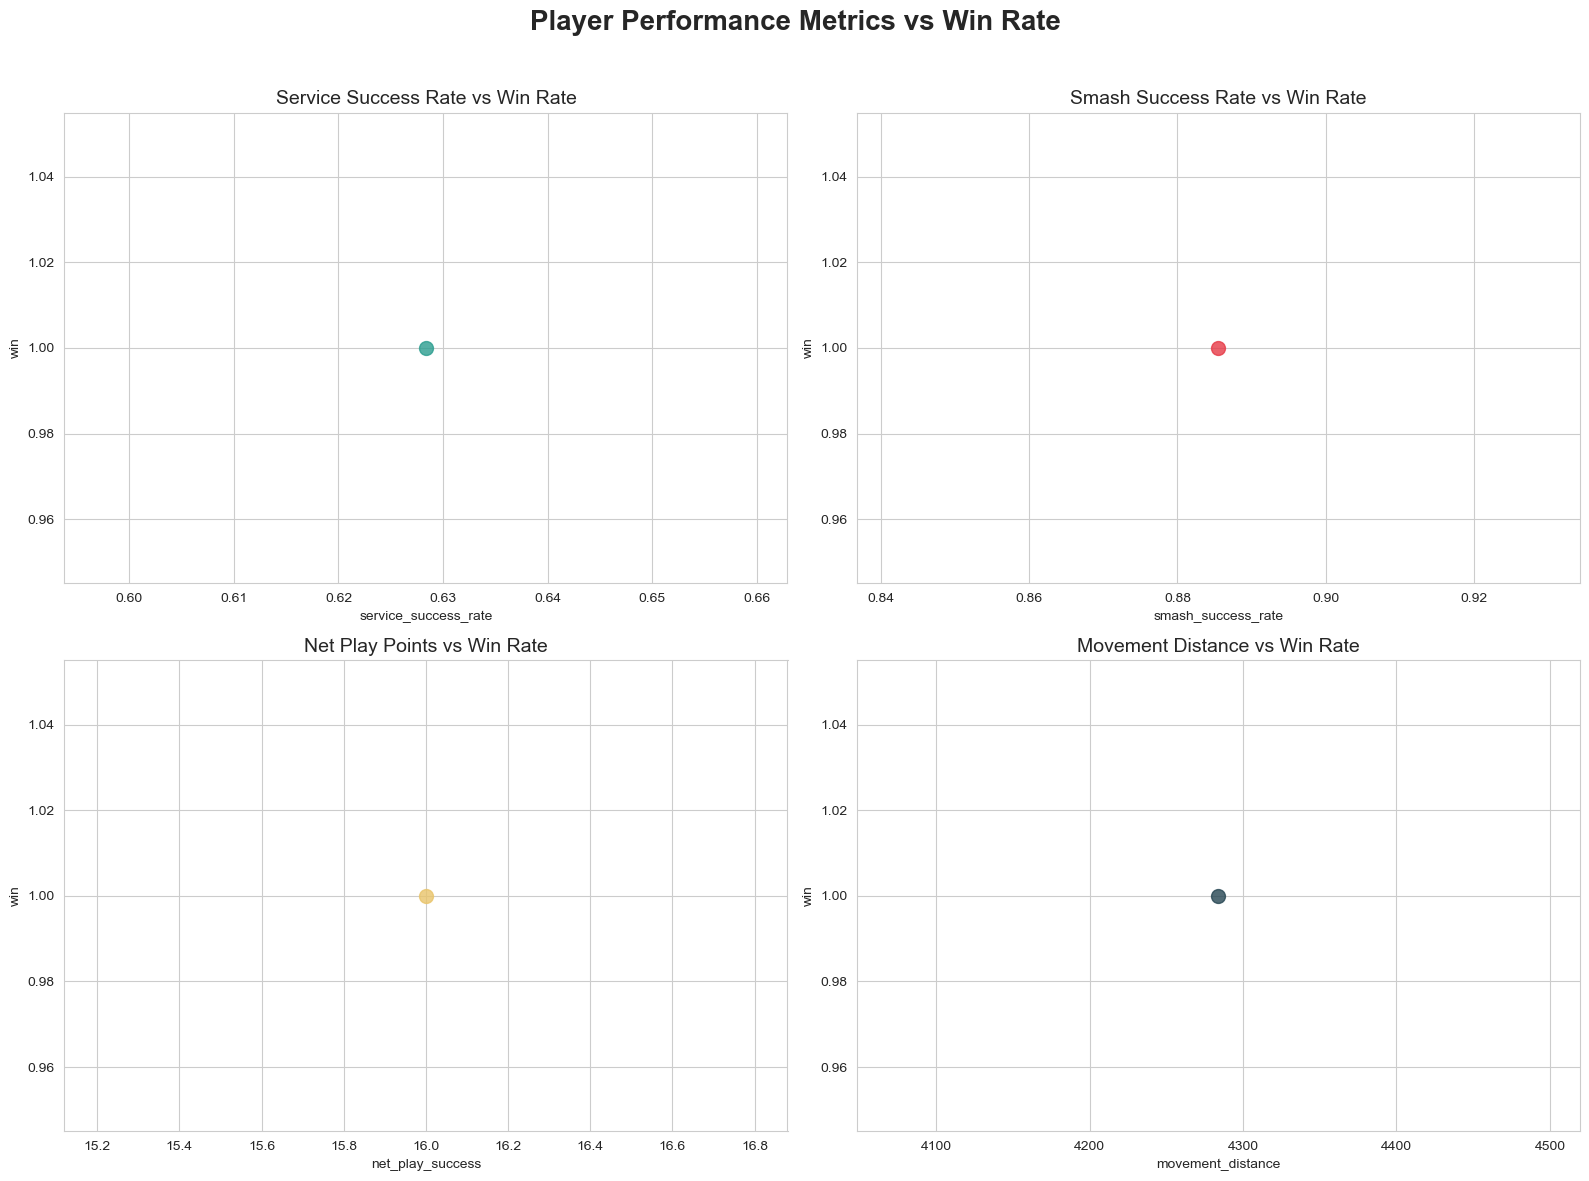

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import os  # 添加缺失的os模块导入
import matplotlib as mpl
import matplotlib.font_manager as fm



# 生成示例数据
def generate_sample_data():
    # 创建数据目录
    os.makedirs('data', exist_ok=True)
    
    # 比赛结果数据
    players = ['Lin Dan', 'Chen Long', 'Viktor Axelsen', 'Kento Momota', 'Lee Chong Wei', 'Shi Yuqi', 'Anthony Ginting', 'Jonatan Christie']
    countries = ['China', 'China', 'Denmark', 'Japan', 'Malaysia', 'China', 'Indonesia', 'Indonesia']
    ages = [38, 34, 29, 28, 40, 27, 26, 25]
    heights = [178, 187, 194, 175, 172, 183, 171, 179]
    weights = [72, 78, 80, 68, 70, 75, 65, 73]
    
    matches_data = {
        'match_id': range(1, 101),
        'player_id': np.random.choice([101, 102, 103, 104, 105, 106, 107, 108], 100),
        'player_name': np.random.choice(players, 100),
        'opponent_id': np.random.choice([201, 202, 203, 204, 205, 206, 207, 208], 100),
        'opponent_name': np.random.choice(players, 100),
        'tournament': np.random.choice(['World Championships', 'Olympics', 'All England Open', 'China Open', 'Indonesia Open'], 100),
        'date': pd.date_range(start='2023-01-01', periods=100),
        'result': np.random.choice(['win', 'lose'], 100, p=[0.6, 0.4]),
        'duration': np.random.randint(30, 90, 100),
        'sets_played': np.random.randint(2, 4, 100),
        'stage': np.random.choice(['Round of 16', 'Quarterfinals', 'Semifinals', 'Final'], 100),
        'nationality': [countries[players.index(name)] for name in np.random.choice(players, 100)],
        'age': [ages[players.index(name)] for name in np.random.choice(players, 100)],
        'height': [heights[players.index(name)] for name in np.random.choice(players, 100)],
        'weight': [weights[players.index(name)] for name in np.random.choice(players, 100)],
        'dominant_hand': np.random.choice(['Left', 'Right'], 100, p=[0.2, 0.8]),
        'world_rank': np.random.randint(1, 50, 100)
    }
    
    # 技术统计数据
    stats_data = {
        'match_id': range(1, 101),
        'player_id': np.random.choice([101, 102, 103, 104, 105, 106, 107, 108], 100),
        'service_total': np.random.randint(40, 70, 100),
        'service_success': np.random.randint(30, 60, 100),
        'smash_attempts': np.random.randint(50, 80, 100),
        'smash_success': np.random.randint(35, 65, 100),
        'net_play_attempts': np.random.randint(30, 50, 100),
        'net_play_success': np.random.randint(15, 30, 100),
        'lob_count': np.random.randint(20, 40, 100),
        'drop_shot_count': np.random.randint(15, 30, 100),
        'errors': np.random.randint(8, 20, 100),
        'rally_length_avg': np.round(np.random.uniform(5.0, 12.0, 100), 1),
        'service_ace': np.random.randint(3, 10, 100)
    }
    
    # 体能数据
    fitness_data = {
        'match_id': range(1, 101),
        'player_id': np.random.choice([101, 102, 103, 104, 105, 106, 107, 108], 100),
        'movement_distance': np.random.randint(3500, 6000, 100),
        'avg_speed': np.round(np.random.uniform(4.5, 6.5, 100), 1),
        'max_speed': np.round(np.random.uniform(7.5, 9.8, 100), 1),
        'avg_heart_rate': np.random.randint(140, 170, 100),
        'max_heart_rate': np.random.randint(175, 195, 100),
        'stamina_index': np.random.randint(75, 95, 100),
        'jump_count': np.random.randint(80, 150, 100),
        'recovery_index': np.round(np.random.uniform(0.7, 0.95, 100), 2)
    }
    
    # 创建DataFrame
    matches_df = pd.DataFrame(matches_data)
    stats_df = pd.DataFrame(stats_data)
    fitness_df = pd.DataFrame(fitness_data)
    
    # 合并数据
    data = pd.merge(pd.merge(matches_df, stats_df, on=['player_id', 'match_id']), 
                   fitness_df, on=['player_id', 'match_id'])
    
    # 新增：保存数据到CSV
    data.to_csv('data/player_performance_data.csv', index=False, encoding='utf-8-sig')
    
    return data


# 数据预处理
def preprocess_data(df):
    # 添加结果列
    df['win'] = df['result'].apply(lambda x: 1 if x == 'win' else 0)
    df['match_result'] = df['result'].apply(lambda x: 'Win' if x == 'win' else 'Loss')
    
    # 计算成功率指标
    df['service_success_rate'] = df['service_success'] / df['service_total']
    df['smash_success_rate'] = df['smash_success'] / df['smash_attempts']
    df['net_play_success_rate'] = df['net_play_success'] / df['net_play_attempts']
    
    # 计算总得点
    df['total_points'] = df['service_success'] + df['smash_success'] + df['net_play_success']
    
    return df

# 创建可视化图表
def create_visualizations(df):
    os.makedirs('visualizations', exist_ok=True)
    
    # 设置专业羽毛球主题颜色
    win_color = '#4caf50'  # 胜利绿色
    loss_color = '#f55c47'  # 失败红色
    
    sns.set_style("whitegrid")  # 使用seaborn的样式设置函数
    sns.set_palette(sns.color_palette([win_color, loss_color]))
    
    # 1. 技术指标对比图
    plt.figure(figsize=(16, 12))
    plt.suptitle('Performance Metrics vs Match Result', fontsize=20, fontweight='bold', y=0.98)
    
    metrics = [
        ('service_success_rate', 'Service Success Rate', 'Percentage', (0.5, 1.0)),
        ('smash_success_rate', 'Smash Success Rate', 'Percentage', (0.5, 1.0)),
        ('net_play_success', 'Net Play Points', 'Count', (10, 35)),
        ('movement_distance', 'Movement Distance', 'Meters', (3000, 6000))
    ]
    
    for i, (metric, title, unit, ylim) in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        
        # 小提琴图展示分布
        sns.violinplot(x='match_result', y=metric, data=df, inner=None, 
                      palette={'Win': win_color, 'Loss': loss_color})
        
        # 箱线图展示关键统计量
        sns.boxplot(x='match_result', y=metric, data=df, width=0.2, 
                   palette={'Win': win_color, 'Loss': loss_color},
                   boxprops=dict(alpha=0.7))
        
        # 添加统计显著性标记
        win_data = df[df['match_result'] == 'Win'][metric]
        loss_data = df[df['match_result'] == 'Loss'][metric]
        t_stat, p_value = stats.ttest_ind(win_data, loss_data, nan_policy='omit')
        
        if p_value < 0.05:
            sig_text = f"p-value: {p_value:.4f} (Significant)" 
        else:
            sig_text = f"p-value: {p_value:.4f} (Not Significant)"
            
        plt.text(0.5, ylim[1]*0.95, sig_text, 
                ha='center', fontsize=12, fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
        
        plt.title(f'{title} vs Match Result', fontsize=14)
        plt.xlabel('Match Result', fontsize=12)
        plt.ylabel(f'{title} ({unit})', fontsize=12)
        plt.ylim(ylim)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('visualizations/performance_metrics_violin.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. 运动员综合表现雷达图
    plt.figure(figsize=(12, 10))
    
    categories = ['service_success_rate', 'smash_success_rate', 
                 'net_play_success', 'movement_distance', 'stamina_index']
    category_names = ['Service Success Rate', 'Smash Success Rate', 'Net Play Points', 'Movement Distance (m)', 'Stamina Index']
    
    player_stats = df.groupby('player_name')[categories].mean()
    
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], category_names, fontsize=12)
    
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], 
              color="grey", size=10)
    plt.ylim(0, 1.1)
    
    player_colors = ['#e63946', '#2a9d8f', '#e9c46a', '#264653', 
                    '#f4a261', '#3a86ff', '#8338ec', '#ff006e']
    
    for i, (player, values) in enumerate(player_stats.iterrows()):
        normalized = (values - values.min()) / (values.max() - values.min())
        normalized = normalized.tolist()
        normalized += normalized[:1]
        
        ax.plot(angles, normalized, linewidth=2, linestyle='solid', 
                label=player, color=player_colors[i])
        ax.fill(angles, normalized, alpha=0.15, color=player_colors[i])
    
    plt.title('Badminton Player Performance Comparison', size=18, fontweight='bold', y=1.15)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=10)
    
    plt.tight_layout()
    plt.savefig('visualizations/player_radar_chart.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. 技术指标相关性热力图
    plt.figure(figsize=(14, 10))
    
    corr_columns = ['service_success_rate', 'smash_success_rate', 
                   'net_play_success', 'movement_distance', 
                   'stamina_index', 'win']
    corr_names = ['Service Success Rate', 'Smash Success Rate', 'Net Play Points', 
                 'Movement Distance', 'Stamina Index', 'Win Rate']
    
    corr_df = df[corr_columns]
    corr_df.columns = corr_names
    
    corr_matrix = corr_df.corr()
    
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='YlGnBu', 
                fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, center=0,
                annot_kws={"size": 12, "weight": "bold"}, cbar_kws={"shrink": 0.8})
    
    plt.title('Performance Metrics Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4. 比赛时间与体能关系分析
    plt.figure(figsize=(14, 10))
    
    ax1 = plt.subplot(2, 1, 1)
    sns.scatterplot(x='duration', y='stamina_index', hue='match_result', 
                    size='stamina_index', sizes=(50, 300), data=df, alpha=0.8,
                    palette={'Win': win_color, 'Loss': loss_color}, ax=ax1)
    
    ax1.set_title('Match Duration vs Stamina Index', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Match Duration (minutes)', fontsize=12)
    ax1.set_ylabel('Stamina Index', fontsize=12)
    
    ax2 = plt.subplot(2, 1, 2)
    sns.histplot(data=df, x='duration', hue='match_result', 
                 element='step', stat='density', common_norm=False, 
                 palette={'Win': win_color, 'Loss': loss_color}, ax=ax2)
    
    ax2.set_title('Match Duration Distribution', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Match Duration (minutes)', fontsize=12)
    ax2.set_ylabel('Density', fontsize=12)
    
    plt.tight_layout(pad=3.0)
    plt.savefig('visualizations/stamina_vs_duration.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 5. 运动员胜率与技术指标关系
    plt.figure(figsize=(16, 12))
    
    player_avg = df.groupby('player_name').agg({
        'win': 'mean',
        'service_success_rate': 'mean',
        'smash_success_rate': 'mean',
        'net_play_success': 'mean',
        'movement_distance': 'mean'
    }).reset_index()
    
    player_avg = player_avg.sort_values('win', ascending=False)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Player Performance Metrics vs Win Rate', fontsize=20, fontweight='bold', y=0.98)
    
    sns.regplot(x='service_success_rate', y='win', data=player_avg, 
                ax=axes[0, 0], color='#2a9d8f', scatter_kws={'s': 100})
    axes[0, 0].set_title('Service Success Rate vs Win Rate', fontsize=14)
    
    sns.regplot(x='smash_success_rate', y='win', data=player_avg, 
                ax=axes[0, 1], color='#e63946', scatter_kws={'s': 100})
    axes[0, 1].set_title('Smash Success Rate vs Win Rate', fontsize=14)
    
    sns.regplot(x='net_play_success', y='win', data=player_avg, 
                ax=axes[1, 0], color='#e9c46a', scatter_kws={'s': 100})
    axes[1, 0].set_title('Net Play Points vs Win Rate', fontsize=14)
    
    sns.regplot(x='movement_distance', y='win', data=player_avg, 
                ax=axes[1, 1], color='#264653', scatter_kws={'s': 100})
    axes[1, 1].set_title('Movement Distance vs Win Rate', fontsize=14)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('visualizations/win_rate_correlation.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    # 生成示例数据
    data = generate_sample_data()
    
    # 数据预处理
    data = preprocess_data(data)
    
    # 创建可视化图表
    create_visualizations(data)